In [1]:
import numpy as np
import pandas as pd

import os
from pathlib import Path
from itertools import product
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
plt.rcParams.update({'font.size': 25})
plt.style.use('seaborn-whitegrid')

In [158]:
data = np.load('./ars_tangle_unbalanced.npy')
data.shape
data = data.mean(axis=2)
As = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
Ps = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
Is = np.arange(len(Ps))
Ys = np.arange(len(As))
df = pd.DataFrame(columns=['adjusted Rand score', 'a', 'percentile max cost'])
l = []
for i, j in product(Is, Ys):
    l.append({'adjusted Rand score': data[j, i], 'a': As[j], 'percentile max cost': Ps[i]})
    
df = pd.DataFrame(l)               
df['a'] = df['a'].astype(str)

In [7]:
experiment_id = '1591037064'
path_in = Path(f'../output/{experiment_id}').resolve()
path_temp = Path(f'/tmp/{experiment_id}.csv').resolve()
is_first_file = True
with open(path_temp,"wb") as output_file:
    for subdir, dirs, files in os.walk(path_in):
        for file in files:
            input_path = f'{subdir}/{file}'
            if is_first_file:
                is_first_file = False
                with open(input_path, "rb") as input_file:
                    output_file.write(input_file.read())
            else:
                with open(input_path, "rb") as input_file:
                    next(input_file)
                    output_file.write(input_file.read())

full_df = pd.read_csv(path_temp, index_col=0).reset_index(drop=True)
full_df = full_df.rename(columns={'agreement': 'a', 'percentile_orders': 'percentile max cost'})
df = full_df.groupby(['a', 'percentile max cost']).mean().reset_index()

In [8]:
df = df[df['a'] != 15]
df = df[df['a'] != 25]
df = df[df['a'] != 35]
df = df[df['a'] != 45]
df = df[df['a'] != 55]

In [9]:

As = df['a'].unique()
Ps = df['percentile max cost'].unique()

In [10]:
As

array([10, 20, 30, 40, 50, 60])

In [11]:
markers = ['o', '^', '<', 'h', '*', '8', 's', 'p', 'P', 'X', 'D']

In [12]:
linestyle_tuple = [
     ('loosely dotted',        'solid'),
     ('dotted',                (0, (1, 1))),
     ('densely dotted',        (0, (1, 1))),

     ('loosely dashed',        (0, (5, 10))),
     ('dashed',                (0, (5, 5))),

     ('dashdotted',            (0, (3, 5, 1, 5))),
     ('densely dashdotted',    (0, (3, 1, 1, 1))),

     ('dashdotdotted',         (0, (3, 5, 1, 5, 1, 5))),
     ('loosely dashdotdotted', (0, (3, 10, 1, 10, 1, 10))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1))),
      ('lol', 'dashed')]

Text(0.5, 0, 'percentile max cost')

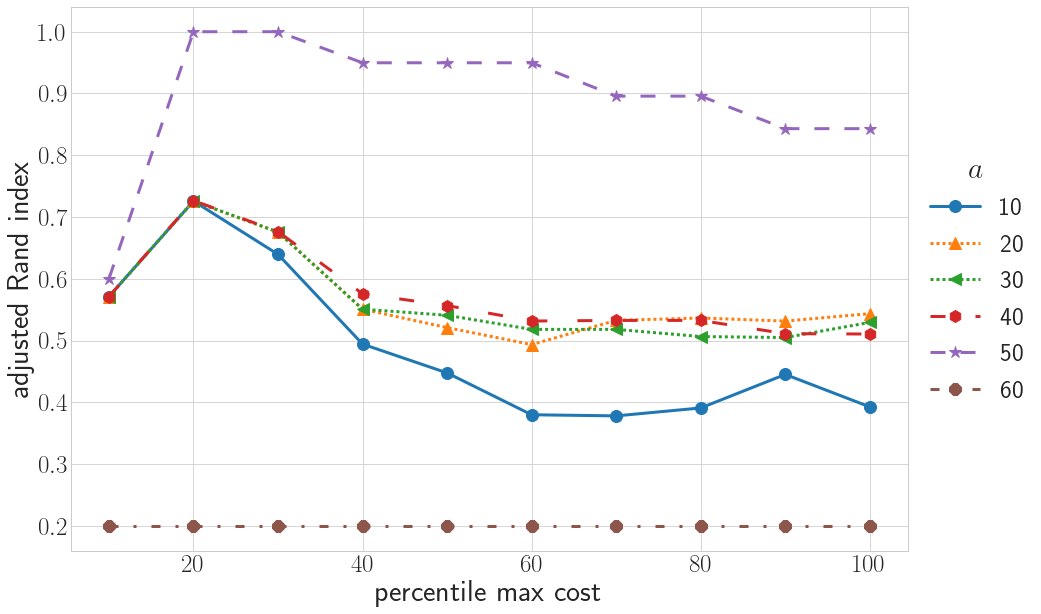

In [13]:
fig = plt.figure(figsize=(15, 10))
ax = plt.axes()
for i, a in enumerate(df['a'].unique()):
    current = df[df['a'] == a]
    ps = current['percentile max cost'].to_numpy()
    rand = current['Adjusted Rand Score'].to_numpy()
    linestyle_tuple[i][1]
    ax.plot(ps, rand, marker=markers[i], linestyle=linestyle_tuple[i][1], label=a, linewidth=3, markersize=12)
legend= ax.legend(title="$a$", loc='center left', bbox_to_anchor=(1, 0.5), )
plt.setp(legend.get_title(),fontsize=30)
ax.set_ylabel('adjusted Rand index', fontsize=30)
ax.set_xlabel('percentile max cost', fontsize=30)

In [15]:

fig.savefig('a_vs_max_p_0.3_q_0.1_lb_0.2.pdf', bbox_inches='tight')